In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
df=pd.read_csv("relationship_comments_17.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,5,7,10,12,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 32549


# General EDA

In [40]:
df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
0,shelbyknits,NaN,NaN,"This is so true, and I’ve seen this even with ...",True,0.0,1509494401,NaN,False,0,...,1511998504,6,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
1,[deleted],NaN,NaN,[removed],True,0.0,1509494402,NaN,False,0,...,1511998504,1,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
2,UsagiDreams,NaN,NaN,Well...at least now you know how she's going t...,True,0.0,1509494402,NaN,False,0,...,1511998505,41,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
3,Sykryk,NaN,NaN,"Do what I did in these situations:\n\n""Were ha...",True,0.0,1509494404,NaN,False,0,...,1511998507,-1,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
4,Amairch,NaN,NaN,Well sounds like your wife needs to learn some...,True,1.0,1509494404,NaN,False,0,...,1511998507,0,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN


In [41]:
df.tail()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
317165,Meraca,NaN,NaN,I agree with everyone here. Tell your mom. Wha...,True,0.0,1512086373,NaN,False,0,...,1513179510,2,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
317166,buttfacedmiscreant11,NaN,NaN,As someone who has lived with too many gross f...,True,0.0,1512086376,NaN,False,0,...,1513179511,2,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
317167,Mr_Bulldops33,NaN,NaN,That’s not a cougar it’s a damn predator who n...,True,0.0,1512086379,NaN,False,0,...,1513179512,0,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
317168,Seshology,NaN,NaN,I used to struggle with lying when I was a tee...,True,0.0,1512086389,NaN,False,0,...,1513179516,3,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
317169,HerezahTip,NaN,NaN,This is exactly how I opted out of my office’s...,True,0.0,1512086391,NaN,False,0,...,1513179517,1,False,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 317182 entries, 0 to 317169
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   author                  317180 non-null  object 
 1   author_flair_css_class  10 non-null      float64
 2   author_flair_text       10 non-null      float64
 3   body                    317166 non-null  object 
 4   can_gild                317170 non-null  object 
 5   controversiality        317170 non-null  float64
 6   created_utc             317170 non-null  object 
 7   distinguished           8794 non-null    object 
 8   edited                  317170 non-null  object 
 9   gilded                  317170 non-null  object 
 10  id                      317170 non-null  object 
 11  is_submitter            317170 non-null  object 
 12  link_id                 317170 non-null  object 
 13  parent_id               317170 non-null  object 
 14  permalink               3

In [43]:
df.isnull().sum() 

author                         2
author_flair_css_class    317172
author_flair_text         317172
body                          16
can_gild                      12
controversiality              12
created_utc                   12
distinguished             308388
edited                        12
gilded                        12
id                            12
is_submitter                  12
link_id                       12
parent_id                     12
permalink                     12
retrieved_on                  12
score                         12
stickied                      22
subreddit                     22
subreddit_id                  22
subreddit_type                22
author_cakeday            316342
mod_note                  317182
mod_reason_by             317182
mod_reason_title          317182
dtype: int64

In [44]:
df.columns

Index(['author', 'author_flair_css_class', 'author_flair_text', 'body',
       'can_gild', 'controversiality', 'created_utc', 'distinguished',
       'edited', 'gilded', 'id', 'is_submitter', 'link_id', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_type', 'author_cakeday', 'mod_note',
       'mod_reason_by', 'mod_reason_title'],
      dtype='object')

In [45]:
df.describe()

,author_flair_css_class,author_flair_text,controversiality,mod_note,mod_reason_by,mod_reason_title
count,10.0,1.000000e+01,317170.000000,0.0,0.0,0.0
mean,0.0,1.510903e+09,0.034202,NaN,NaN,NaN
std,0.0,7.454533e+05,0.181749,NaN,NaN,NaN
min,0.0,1.509711e+09,0.000000,NaN,NaN,NaN
25%,0.0,1.510507e+09,0.000000,NaN,NaN,NaN
50%,0.0,1.511049e+09,0.000000,NaN,NaN,NaN
75%,0.0,1.511378e+09,0.000000,NaN,NaN,NaN
max,0.0,1.511970e+09,1.000000,NaN,NaN,NaN


# One Feature EDA 

# Controversialty

0.0    306322
1.0     10848
Name: controversiality, dtype: int64


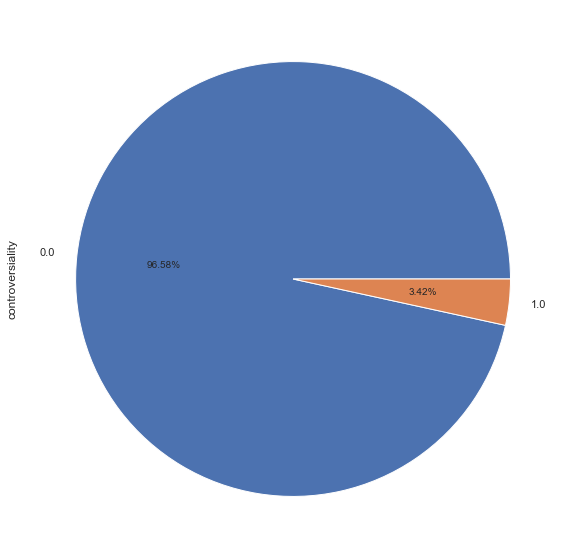

In [46]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [47]:
df[df['controversiality'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
26888,piratename223,NaN,NaN,Its mine and my husbands anniversary next week...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45198,CatOfGrey,NaN,NaN,Came here to say this.,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
She's not aware of any reasoning. She is spewing for the sake of spewing.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121523,pbblankgirl,NaN,NaN,"Short answer: Yes, break up",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139324,hungry_dugong,NaN,NaN,It could be innocent on his behalf.,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188751,hungry_dugong,NaN,NaN,But is anyone truly ready?,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199974,pbblankgirl,NaN,NaN,Sounds like she has given up on your relations...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201856,pbblankgirl,NaN,NaN,Sounds like you need to burn the bridge and sc...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You should tell him your AIDS is acting up and you'll be back home when it goes away.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242211,pbblankgirl,NaN,NaN,I'd like to add that breakups can be a one-sid...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Converting Controversiality values and deleting unimportant rows

In [48]:
df=df.dropna(subset=['controversiality'])

In [49]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

0    306322
1     10848
Name: controversiality, dtype: int64


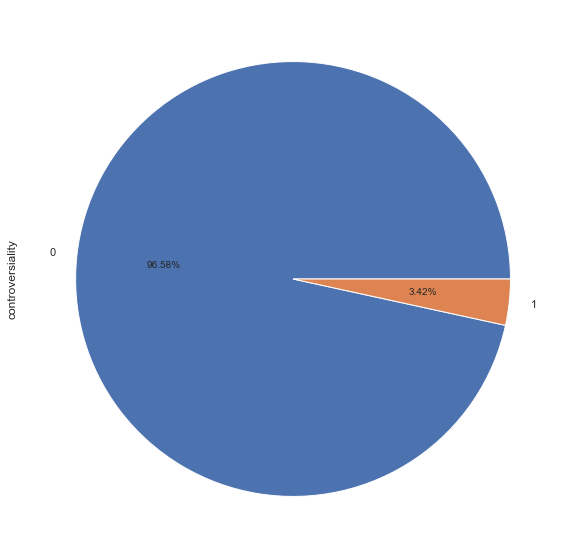

In [50]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [51]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

# Stickied

False    317160
Name: stickied, dtype: int64


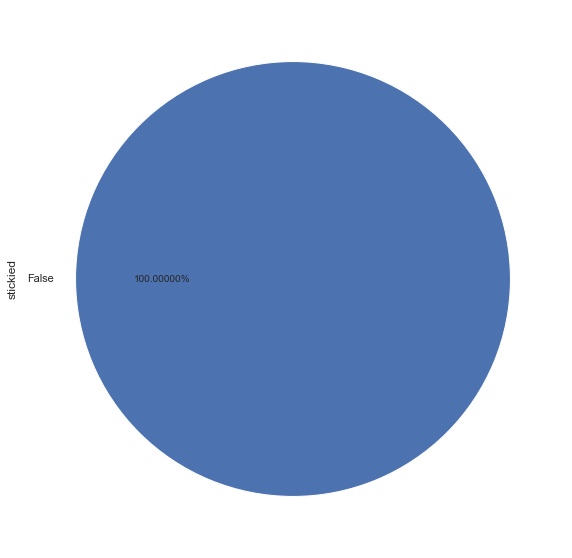

In [52]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [53]:
df["stickied"].unique()

array([False, nan], dtype=object)

In [54]:
df[df['stickied'].isna()] #falsch formatiert

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
He has no idea and I feel like I'm about yo burst with excitement. I love that we do stuff like this for each other.,True,0.0,1.509711e+09,NaN,False,0,dpa92xm,False,t3_7aivfl,t3_7aivfl,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extreme patience required. Make sure she has good support from counseling. Keep stressing your goal: That they grow into a good adult that does good things for the world.,True,0.0,1.509859e+09,NaN,False,0,dpd8bt2,False,t3_7auofb,t1_dpcyou5,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Medium-length answer: Find someone else. This guy is unaccommodating, inconsiderate, guilt-tripping, whiny garbage...break up",True,0.0,1.510472e+09,NaN,False,0,dpp80ec,False,t3_7ce3xh,t3_7ce3xh,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"If that's true, it seems a shame that he's gotten to know her well enough to kiss her but she never mentioned a fiance even in passing.",True,0.0,1.510611e+09,NaN,False,0,dprx721,False,t3_7cniyk,t1_dprsveq,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"I know when we had our first there was still a doubt. Not about who we were having them with, but whether we wanted kids or were ready or were we making a mistake.",True,0.0,1.510991e+09,NaN,False,0,dpzviqt,False,t3_7dq5ev,t1_dpzv8z4,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"I suggest having a come to Jesus talk. If that doesn't work, find someone more mature.",True,0.0,1.511107e+09,NaN,False,0,dq1px2h,False,t3_7e19ee,t3_7e19ee,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...or something,True,0.0,1.511124e+09,NaN,False,0,dq2423v,False,t3_7e36cq,t3_7e36cq,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Also, let him drink his pain away...that's just how some people cope.",True,0.0,1.511462e+09,NaN,False,0,dq8tsjg,False,t3_7f1j1b,t1_dq8tghn,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Honestly, it sounds like she's into you, you're not into her, and she's doing what's necessary to make unrequited romantic feelings go away. Maybe there's some other reason that she wants to stop investing energy into you and wants to keep it casual and low effort. Whatever the reason is, comments on social media and sporadic texts still allow her to do that.",True,0.0,1.511722e+09,NaN,False,0,dqd9sct,False,t3_7fo9z6,t1_dqd7q1w,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"BY THE WAY THERE'S A VIDEO OF TWO RUSSIAN CHILDREN BASHING IN SOME OLD PERSON'S BRAINS WITH A HAMMER FOR NO REASON. So, there's that?",True,0.0,1.511970e+09,NaN,False,0,dqicgm8,False,t3_7g6qqf,t1_dqi9ff4,...,t5_2qjvn,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
 df=df.dropna(subset=['stickied'])

In [56]:
df['stickied'] = df['stickied'].replace(False, "0")

0    317160
Name: stickied, dtype: int64


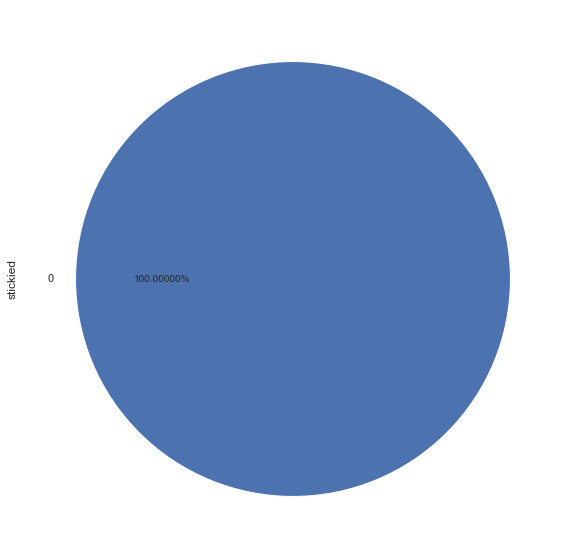

In [57]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [58]:
df["stickied"].unique()

array(['0'], dtype=object)

# link_id

t3_7ak8dr    1056
t3_7buc2z    1038
t3_7erf46    1004
t3_7butpj     862
t3_7calys     806
             ... 
t3_7c8n8p       1
t3_7c8n3r       1
t3_7c8kdp       1
t3_7emfns       1
t3_7gqv12       1
Name: link_id, Length: 21765, dtype: int64


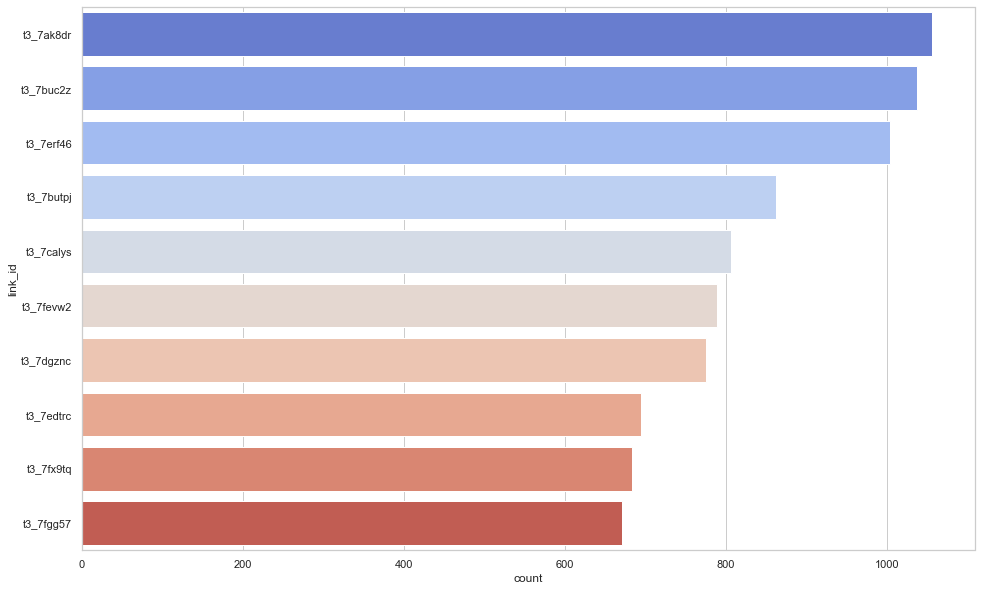

In [59]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [60]:
df[df['link_id'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


# Subreddit_id

t5_2qjvn    317160
Name: subreddit_id, dtype: int64


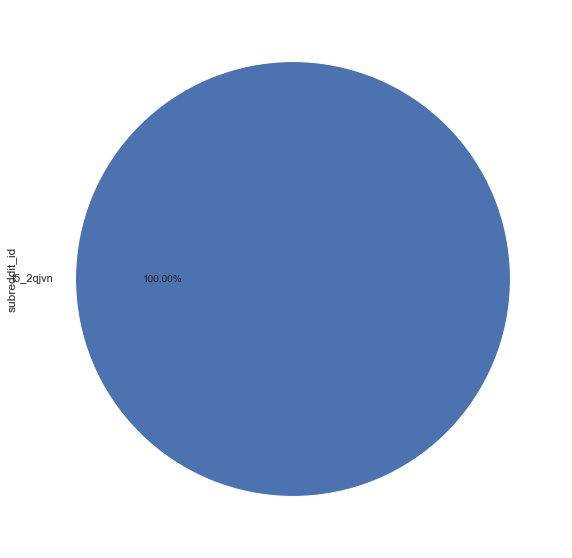

In [61]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 
#kann gelöscht werden
# keine anderen Subreddits

In [62]:
df[df['subreddit_id'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


# Author

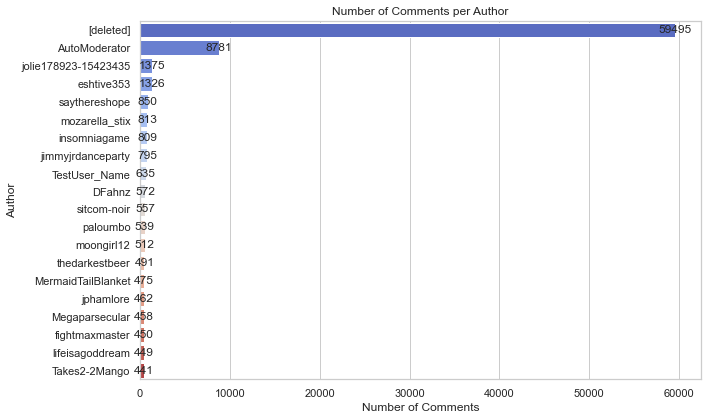

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [64]:
 df[df['author'].str.contains('AutoModerator')]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
138,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509495280,moderator,False,0,...,1511998914,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
229,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509496035,moderator,False,0,...,1511999362,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
253,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509496185,moderator,False,0,...,1511999441,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
319,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509496673,moderator,False,0,...,1511999660,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
344,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509496841,moderator,False,0,...,1511999734,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316919,AutoModerator,NaN,NaN,The above submission has been **removed** for ...,True,0,1512084887,moderator,False,0,...,1513178778,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
316953,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1512085111,moderator,False,0,...,1513178894,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
317050,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1512085735,moderator,False,0,...,1513179185,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
317143,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1512086254,moderator,False,0,...,1513179449,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN


In [65]:
df[df['body'].str.startswith("The above", na=False)]


,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
138,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509495280,moderator,False,0,...,1511998914,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
229,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509496035,moderator,False,0,...,1511999362,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
253,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509496185,moderator,False,0,...,1511999441,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
319,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509496673,moderator,False,0,...,1511999660,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
344,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1509496841,moderator,False,0,...,1511999734,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316919,AutoModerator,NaN,NaN,The above submission has been **removed** for ...,True,0,1512084887,moderator,False,0,...,1513178778,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
316953,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1512085111,moderator,False,0,...,1513178894,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
317050,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1512085735,moderator,False,0,...,1513179185,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN
317143,AutoModerator,NaN,NaN,The above submission has been **removed** beca...,True,0,1512086254,moderator,False,0,...,1513179449,1,0,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN


# Alle Automoderatoren löschen

In [66]:
df=df.drop(df[df['author'].str.contains('AutoModerator')].index)

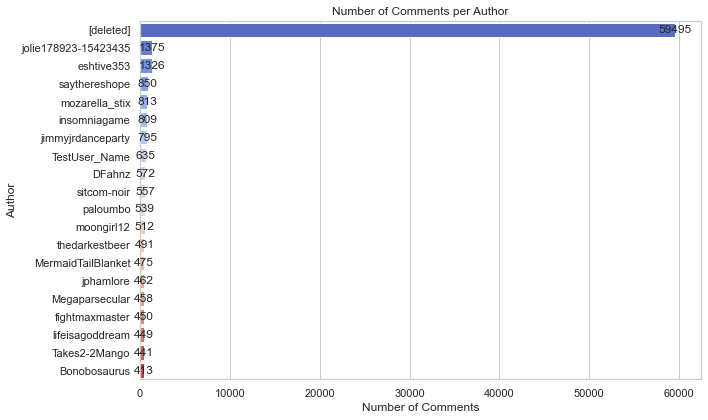

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [68]:
df[df['body'].str.startswith("The above", na=False)]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


# Author flair text

# NA mit 0 füllen

In [69]:
df['author_flair_text'].fillna('0', inplace=True)

0    308379
Name: author_flair_text, dtype: int64


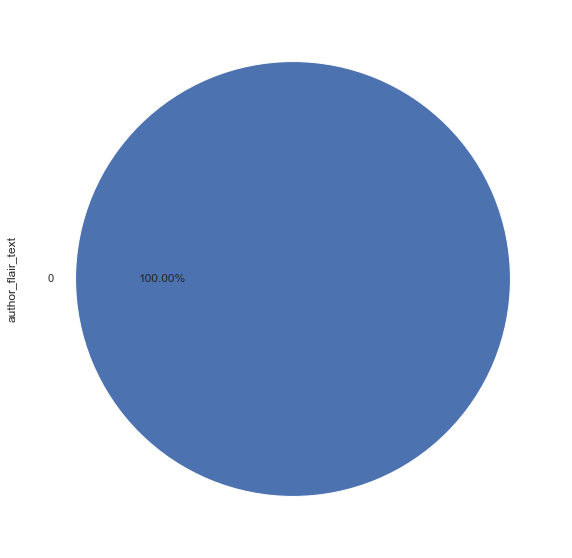

In [70]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationships    308379
Name: subreddit, dtype: int64


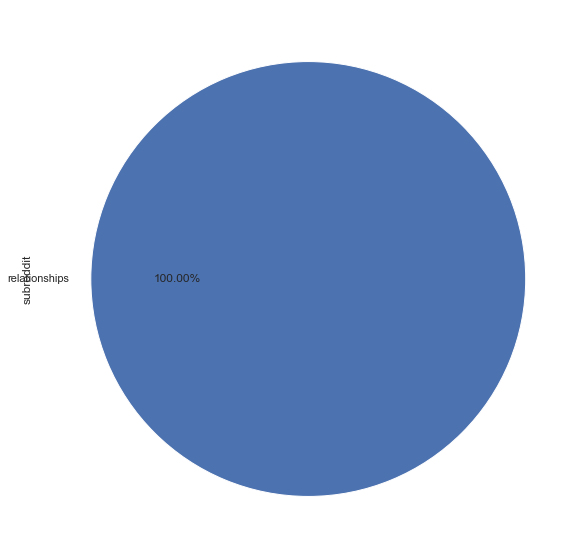

In [71]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [72]:
df[df['subreddit'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


# Created_utc

In [73]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [74]:
df['created_utc']

0        2017-11-01 00:00:01
1        2017-11-01 00:00:02
2        2017-11-01 00:00:02
3        2017-11-01 00:00:04
4        2017-11-01 00:00:04
                 ...        
317165   2017-11-30 23:59:33
317166   2017-11-30 23:59:36
317167   2017-11-30 23:59:39
317168   2017-11-30 23:59:49
317169   2017-11-30 23:59:51
Name: created_utc, Length: 308379, dtype: datetime64[ns]

# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

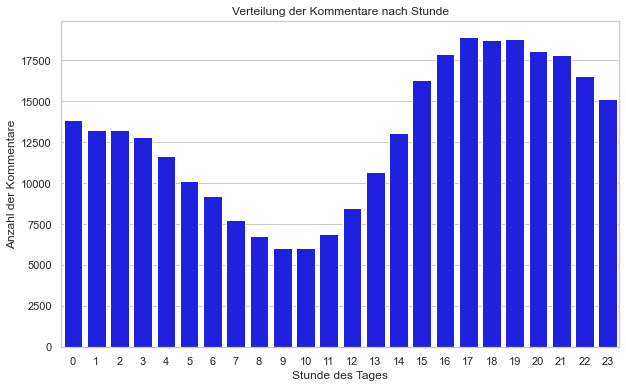

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

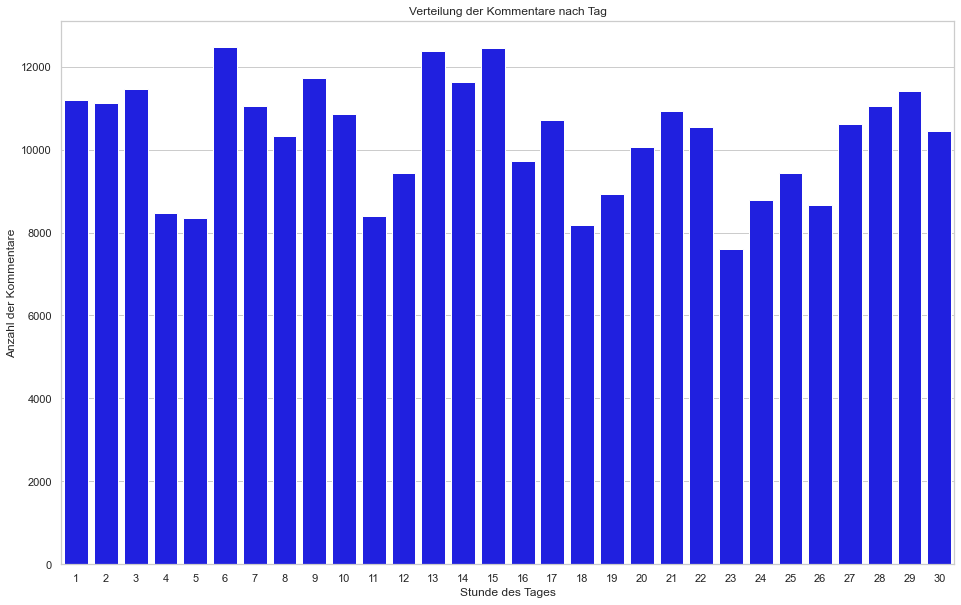

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Year

In [77]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [78]:
 df[pd.isna(df['created_day'])]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title,created_hour,created_day,created_year


# Gilded

In [79]:
df['gilded'] = df['gilded'].replace(0,"0")
df['gilded'] = df['gilded'].replace(1,"1")
df['gilded'] = df['gilded'].replace(2,"2")

0    308306
1        68
2         5
Name: gilded, dtype: int64


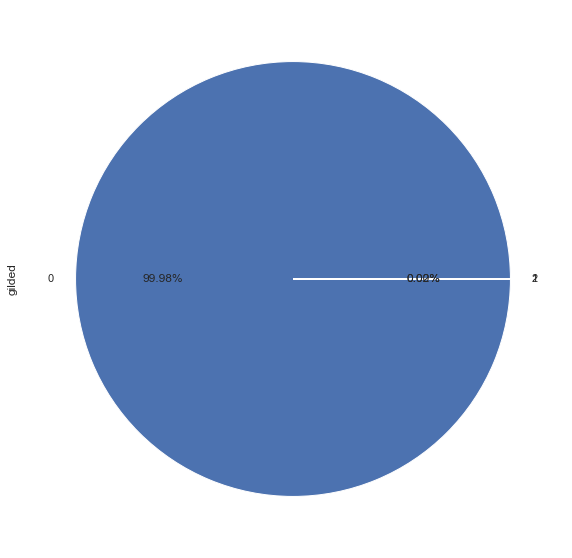

In [80]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

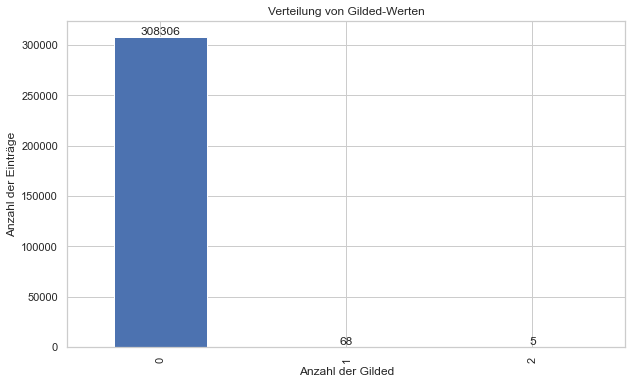

In [81]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')


In [82]:
df["gilded"].unique()

array(['0', '1', '2'], dtype=object)

# Distinguished

In [83]:
df['distinguished'].fillna('0', inplace=True)

0            308375
moderator         4
Name: distinguished, dtype: int64


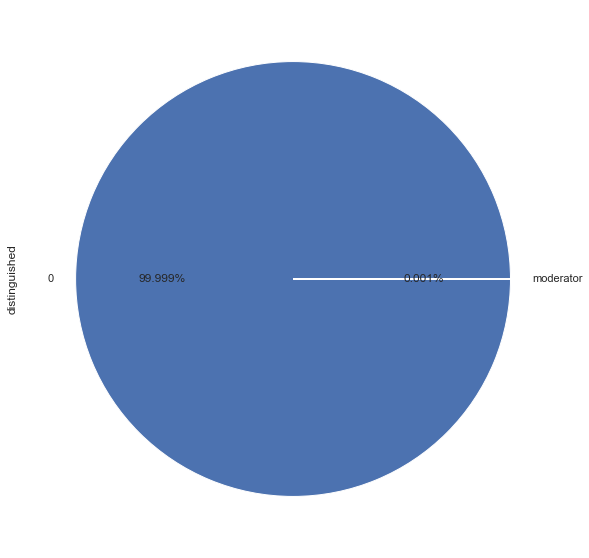

In [84]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [85]:
df["gilded"].unique()

array(['0', '1', '2'], dtype=object)

# Löschen von automatisch generierten Text

In [86]:
df.drop(df[df['distinguished'] == 'moderator'].iloc[2:4].index, inplace=True)


In [87]:
 df[df['distinguished'] == 'moderator']


,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title,created_hour,created_day,created_year
136604,RememberKoomValley,NaN,0,The best thing to do in these cases is always ...,True,0,2017-11-13 18:58:49,moderator,False,0,...,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN,18,13,2017
146043,autumnx,NaN,0,"Yes, sorry this was my fault as your title is ...",True,0,2017-11-14 15:23:16,moderator,False,0,...,relationships,t5_2qjvn,public,NaN,NaN,NaN,NaN,15,14,2017


# Edited

In [88]:
df["edited"].unique()

array(['False', '1509494960', '1509496290', ..., '1512171650',
       '1512089326', '1512152264'], dtype=object)

In [89]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")


In [90]:
df["edited"].unique()

array(['0', '1'], dtype=object)

0    295857
1     12520
Name: edited, dtype: int64


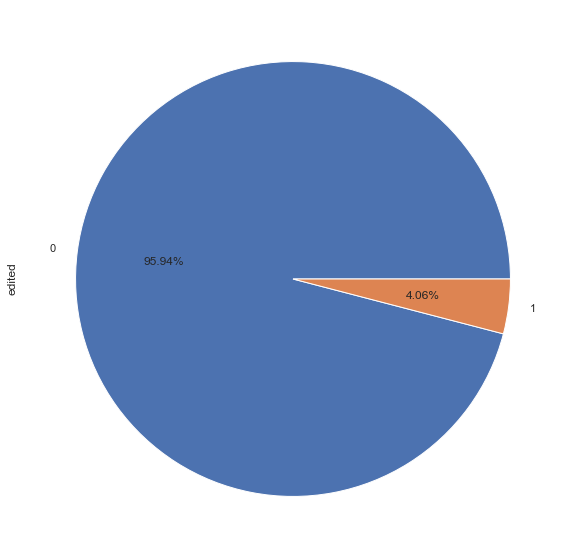

In [91]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [92]:
df[df['edited'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title,created_hour,created_day,created_year


# Score

In [93]:
df["score"].value_counts()

1       74078
2       35755
3       22947
4       10884
5       10853
        ...  
1063        1
481         1
318         1
5681        1
1980        1
Name: score, Length: 1800, dtype: int64

In [94]:
df['score'] = df["score"].astype(int)

In [95]:
df["score"].mean()

16.97896081744099

In [96]:
df.describe()

,author_flair_css_class,score,mod_note,mod_reason_by,mod_reason_title,created_hour,created_day,created_year
count,0.0,308377.000000,0.0,0.0,0.0,308377.000000,308377.000000,308377.0
mean,NaN,16.978961,NaN,NaN,NaN,12.812687,15.280942,2017.0
std,NaN,82.956798,NaN,NaN,NaN,7.288099,8.704164,0.0
min,NaN,-308.000000,NaN,NaN,NaN,0.000000,1.000000,2017.0
25%,NaN,1.000000,NaN,NaN,NaN,6.000000,8.000000,2017.0
50%,NaN,3.000000,NaN,NaN,NaN,15.000000,15.000000,2017.0
75%,NaN,10.000000,NaN,NaN,NaN,19.000000,23.000000,2017.0
max,NaN,6055.000000,NaN,NaN,NaN,23.000000,30.000000,2017.0


In [97]:
df.columns

Index(['author', 'author_flair_css_class', 'author_flair_text', 'body',
       'can_gild', 'controversiality', 'created_utc', 'distinguished',
       'edited', 'gilded', 'id', 'is_submitter', 'link_id', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_type', 'author_cakeday', 'mod_note',
       'mod_reason_by', 'mod_reason_title', 'created_hour', 'created_day',
       'created_year'],
      dtype='object')

In [98]:
df.isnull().sum() 


author                         0
author_flair_css_class    308377
author_flair_text              0
body                           4
can_gild                       0
controversiality               0
created_utc                    0
distinguished                  0
edited                         0
gilded                         0
id                             0
is_submitter                   0
link_id                        0
parent_id                      0
permalink                      0
retrieved_on                   0
score                          0
stickied                       0
subreddit                      0
subreddit_id                   0
subreddit_type                 0
author_cakeday            307537
mod_note                  308377
mod_reason_by             308377
mod_reason_title          308377
created_hour                   0
created_day                    0
created_year                   0
dtype: int64

In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 308377 entries, 0 to 317169
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   author                  308377 non-null  object        
 1   author_flair_css_class  0 non-null       float64       
 2   author_flair_text       308377 non-null  object        
 3   body                    308373 non-null  object        
 4   can_gild                308377 non-null  object        
 5   controversiality        308377 non-null  object        
 6   created_utc             308377 non-null  datetime64[ns]
 7   distinguished           308377 non-null  object        
 8   edited                  308377 non-null  object        
 9   gilded                  308377 non-null  object        
 10  id                      308377 non-null  object        
 11  is_submitter            308377 non-null  object        
 12  link_id                 308377 non-

# Two feature analyses

# Hours vs score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

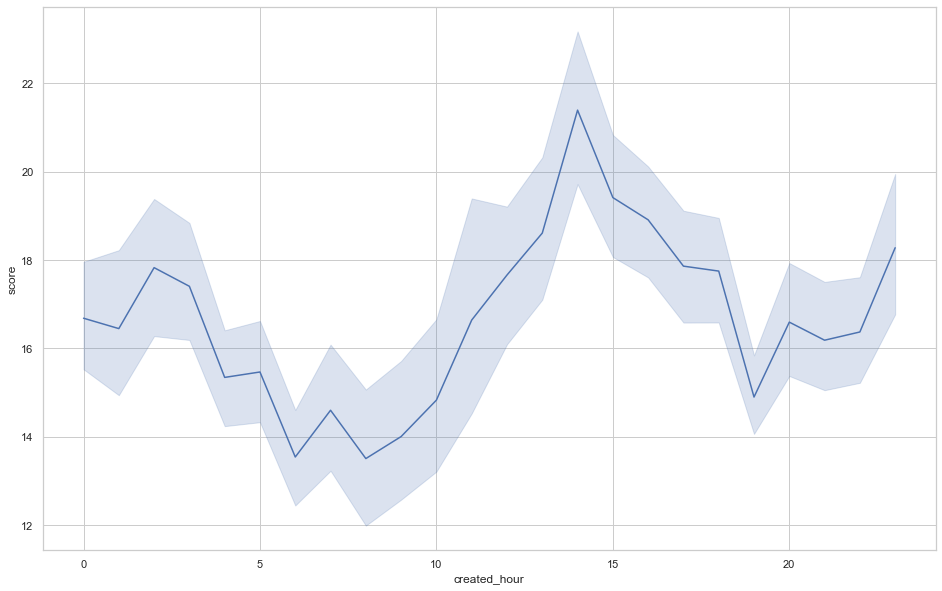

In [100]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Day vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

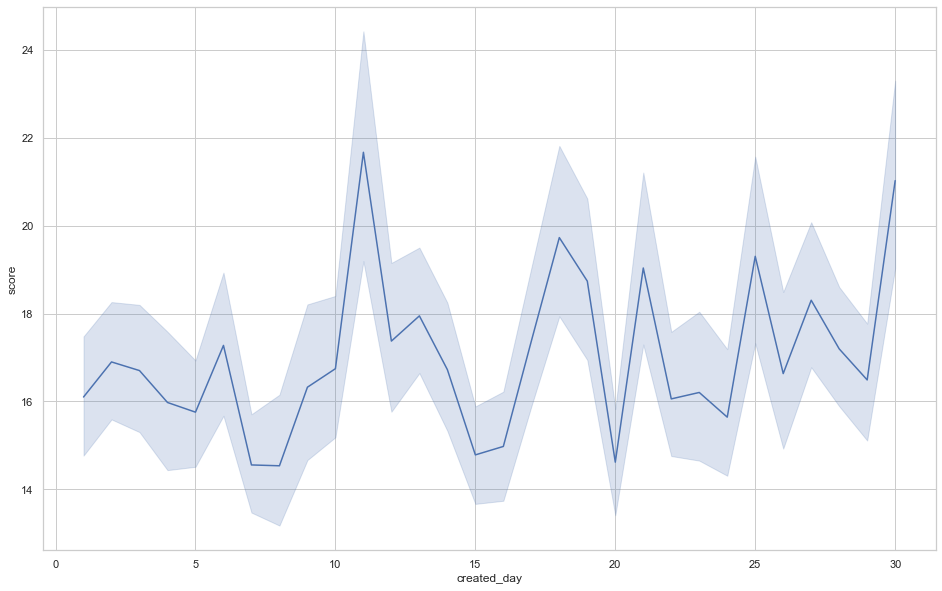

In [101]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

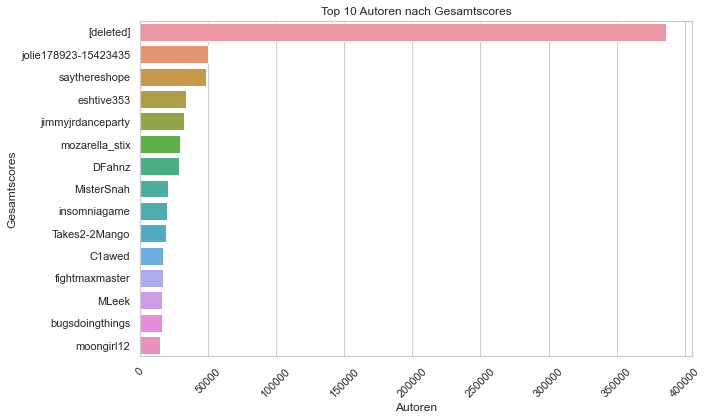

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

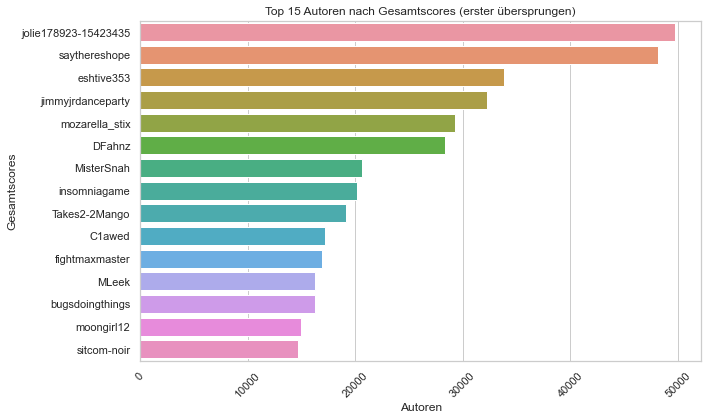

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Column removing

In [104]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","mod_note","mod_reason_by","mod_reason_title","permalink"], axis = 1)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308377 entries, 0 to 317169
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             308377 non-null  object        
 1   author_flair_text  308377 non-null  object        
 2   body               308373 non-null  object        
 3   can_gild           308377 non-null  object        
 4   controversiality   308377 non-null  object        
 5   created_utc        308377 non-null  datetime64[ns]
 6   distinguished      308377 non-null  object        
 7   edited             308377 non-null  object        
 8   gilded             308377 non-null  object        
 9   id                 308377 non-null  object        
 10  link_id            308377 non-null  object        
 11  parent_id          308377 non-null  object        
 12  score              308377 non-null  int64         
 13  stickied           308377 non-null  object       

In [106]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 4
can_gild             0
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Row deleting

# Delet all Comments that have have a NA

In [107]:
df[pd.isna(df['body'])]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
3480,throwaway8753190,0,NaN,True,0,2017-11-01 10:03:34,0,1,0,dp6lhcc,t3_79v7n5,t1_dp55ljo,1,0,10,1,2017
45620,[deleted],0,NaN,False,0,2017-11-05 07:35:51,0,1,0,dpdc183,t3_7awb0c,t1_dpdbygk,1,0,7,5,2017
161915,metanixo,0,NaN,True,0,2017-11-15 19:44:30,0,1,0,dpvem6s,t3_7d69tk,t1_dpve6a6,1,0,19,15,2017
162104,metanixo,0,NaN,True,0,2017-11-15 19:56:57,0,1,0,dpvfdny,t3_7d69tk,t1_dpveyu0,1,0,19,15,2017


In [108]:
df = df.dropna(subset=['body'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308373 entries, 0 to 317169
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             308373 non-null  object        
 1   author_flair_text  308373 non-null  object        
 2   body               308373 non-null  object        
 3   can_gild           308373 non-null  object        
 4   controversiality   308373 non-null  object        
 5   created_utc        308373 non-null  datetime64[ns]
 6   distinguished      308373 non-null  object        
 7   edited             308373 non-null  object        
 8   gilded             308373 non-null  object        
 9   id                 308373 non-null  object        
 10  link_id            308373 non-null  object        
 11  parent_id          308373 non-null  object        
 12  score              308373 non-null  int64         
 13  stickied           308373 non-null  object       

In [110]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 0
can_gild             0
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body analyses and Preprocessing

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

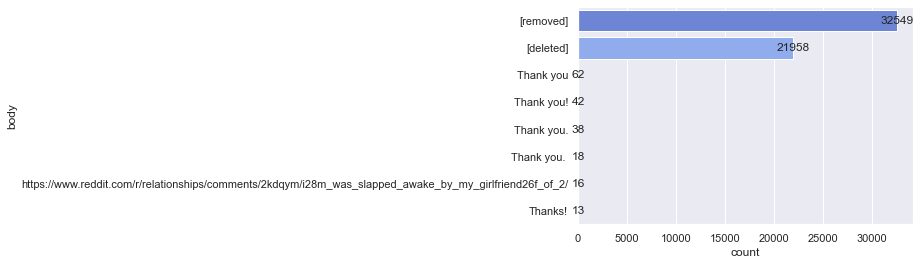

In [111]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben removed comments mehr likes

In [112]:
filtered_df=df[df['body'] == '[removed]']

In [113]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,32549.000000,32549.000000,32549.000000,32549.0
mean,3.380841,12.739162,15.206397,2017.0
std,20.346933,7.115615,8.792131,0.0
min,-182.000000,0.000000,1.000000,2017.0
25%,1.000000,6.000000,7.000000,2017.0
50%,1.000000,15.000000,15.000000,2017.0
75%,2.000000,19.000000,22.000000,2017.0
max,1133.000000,23.000000,30.000000,2017.0


Text(0.5, 1.0, 'Histogramm der Scores')

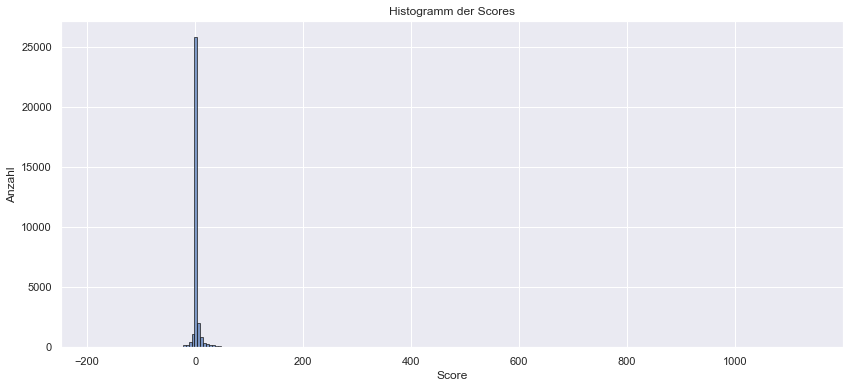

In [114]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

Removed Kommentare Löschen

In [115]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

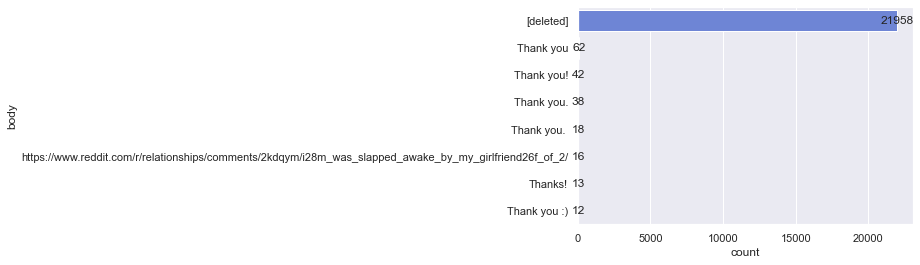

In [116]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben deleted Comments mehr likes

In [117]:
filtered_df_del=df[df['body'] == '[deleted]']

In [118]:
filtered_df_del

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
14,[deleted],0,[deleted],True,0,2017-11-01 00:01:27,0,0,0,dp61tzi,t3_79ynjn,t3_79ynjn,1,0,0,1,2017
23,[deleted],0,[deleted],True,0,2017-11-01 00:02:00,0,0,0,dp61uxf,t3_79zxjr,t3_79zxjr,0,0,0,1,2017
45,[deleted],0,[deleted],True,0,2017-11-01 00:04:10,0,0,0,dp61ynm,t3_79xht4,t1_dp5t9hl,2,0,0,1,2017
69,[deleted],0,[deleted],True,0,2017-11-01 00:06:58,0,0,0,dp623gd,t3_79vvc4,t3_79vvc4,1,0,0,1,2017
104,[deleted],0,[deleted],True,0,2017-11-01 00:10:35,0,0,0,dp629mb,t3_79ztzh,t1_dp61qm8,2,0,0,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317083,[deleted],0,[deleted],True,0,2017-11-30 23:51:31,0,0,0,dql0yak,t3_7gnaet,t1_dqkzmxb,2,0,23,30,2017
317102,[deleted],0,[deleted],True,0,2017-11-30 23:53:21,0,0,0,dql11q3,t3_7gq03n,t1_dql0tnq,6,0,23,30,2017
317139,[deleted],0,[deleted],True,0,2017-11-30 23:57:17,0,0,0,dql190r,t3_7gq03n,t1_dql12sq,6,0,23,30,2017
317146,[deleted],0,[deleted],True,0,2017-11-30 23:57:36,0,0,0,dql19ml,t3_7goc7w,t3_7goc7w,1,0,23,30,2017


In [119]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,21958.000000,21958.000000,21958.000000,21958.0
mean,7.819974,12.599053,15.134575,2017.0
std,55.992354,7.250098,8.573532,0.0
min,-121.000000,0.000000,1.000000,2017.0
25%,1.000000,6.000000,8.000000,2017.0
50%,1.000000,14.000000,15.000000,2017.0
75%,3.000000,19.000000,22.000000,2017.0
max,3632.000000,23.000000,30.000000,2017.0


In [120]:
len(filtered_df_del)

21958

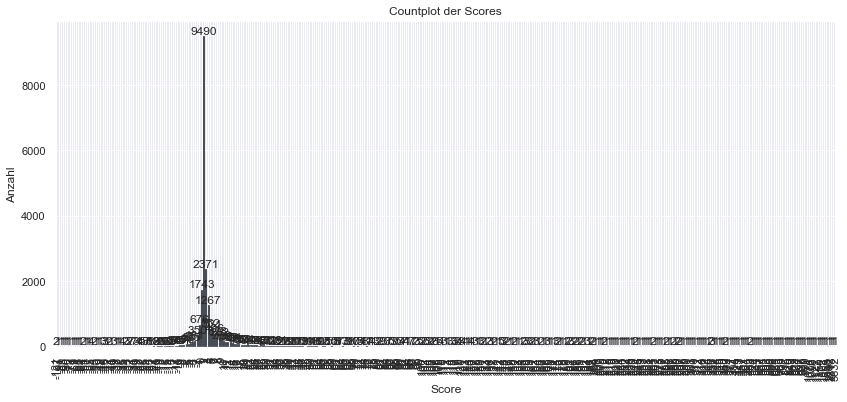

In [121]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')

# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die Deleted wurden löschen

In [122]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

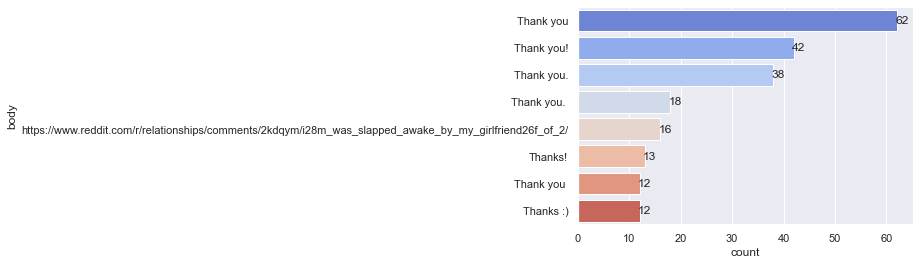

In [123]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Http und redditnames removes

# Löschen aller Authoren die AutoModerator sind

In [124]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

# Http und Redditnames removes

In [125]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
194927,dinosaur_train,0,/r/stepparents,True,0,2017-11-19 01:04:49,0,0,0,dq0yfue,t3_7dwty0,t3_7dwty0,2,0,1,19,2017


In [126]:
df = df.drop(selected_sub_men.index)

In [127]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
15297,Delaunt,0,r/firstworldproblems,True,0,2017-11-02 12:04:42,0,0,0,dp8h0gf,t3_7a8r96,t3_7a8r96,-1,0,12,2,2017
250959,_vjh,0,r/UnexpectedFactorial,True,0,2017-11-24 18:45:14,0,0,0,dqaa8uk,t3_7f2snz,t1_dq9ru95,3,0,18,24,2017
253735,noncompliantfuture,0,r/raisedbynarcississts,True,0,2017-11-25 00:58:15,0,0,0,dqarja7,t3_7f9irb,t3_7f9irb,4,0,0,25,2017
257913,cleveraccountname13,0,r/iamverysmartandsuperhot,True,0,2017-11-25 15:34:59,0,0,0,dqbi04p,t3_7fffrc,t1_dqbhvm0,12,0,15,25,2017
274725,nocatsnodogsnokids,0,r/cf4cf,True,0,2017-11-27 04:50:43,0,0,0,dqe51u5,t3_7fsho5,t1_dqe50u6,15,0,4,27,2017


In [128]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [129]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [130]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [131]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
14619,allied17,0,https://reddit.com/r/Assistance/comments/hax0t...,True,0,2017-11-02 09:31:22,0,0,0,dp8d4l1,t3_79zq60,t3_79zq60,1,0,9,2,2017
18446,RockFan2012,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-02 17:28:40,0,0,0,dp8y432,t3_7ab1zi,t1_dp8q5em,29,0,17,2,2017
82507,love_hate_throwaway,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-08 17:45:15,0,0,0,dpj6kwo,t3_7bmwkv,t3_7bmwkv,1,0,17,8,2017
82554,love_hate_throwaway,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-08 17:48:38,0,0,0,dpj6snc,t3_7bmz6m,t3_7bmz6m,2,0,17,8,2017
94114,jolie178923-15423435,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-09 18:29:27,0,0,0,dpkzvi1,t3_7btnfi,t1_dpkzup2,0,0,18,9,2017
94118,jolie178923-15423435,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-09 18:29:34,0,0,0,dpkzvr9,t3_7btnfi,t1_dpkz7rb,0,0,18,9,2017
150392,nixpuss,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-14 21:37:34,0,0,0,dptq9ft,t3_7cwmsu,t1_dptlbx5,2,0,21,14,2017
150393,nixpuss,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-14 21:37:45,0,0,0,dptq9ut,t3_7cwmsu,t1_dptgp5x,2,0,21,14,2017
150399,nixpuss,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-14 21:38:03,0,0,0,dptqaj6,t3_7cwmsu,t3_7cwmsu,3,0,21,14,2017
164839,TuggyMcPhearson,0,https://www.reddit.com/r/relationships/comment...,True,0,2017-11-15 23:40:00,0,0,0,dpvsdib,t3_7d6pa0,t1_dpvfxbl,9,0,23,15,2017


In [132]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [133]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows 

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
232605,theHelperdroid,0,Helper bot and his creator love you! Here is s...,True,0,2017-11-22 17:06:28,0,0,0,dq73c2r,t3_7erf46,t1_dq73boo,2,0,17,22,2017
232820,theHelperdroid,0,Helper bot and his creator love you! Here is s...,True,0,2017-11-22 17:19:05,0,0,0,dq742dq,t3_7erf46,t1_dq7429r,2,0,17,22,2017
270734,theHelperdroid,0,Helper bot and his creator love you! Here is s...,True,0,2017-11-26 20:59:39,0,0,0,dqdhl96,t3_7flyht,t1_dqdhkyr,1,0,20,26,2017
288116,theHelperdroid,0,Helper bot and his creator love you! Here is s...,True,0,2017-11-28 13:32:06,0,0,0,dqgbssd,t3_7g43o4,t1_dqgbsp5,2,0,13,28,2017
291458,theHelperdroid,0,Helper bot and his creator love you! Here is s...,True,0,2017-11-28 19:18:37,0,0,0,dqgv0b3,t3_7g5vkm,t1_dqgv04z,-1,0,19,28,2017
292229,theHelperdroid,0,Helper bot and his creator love you! Here is s...,True,0,2017-11-28 20:17:11,0,0,0,dqgyntu,t3_7g5vkm,t1_dqgynnp,6,0,20,28,2017


In [134]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Lösche Zeilen, in denen die Spalte 'body' mit 'Helper bot' beginnt
df = df[~df['body'].str.startswith('Helper bot')]


In [135]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_94297/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
14263,[deleted],0,&gt;jokingly does things like hitting me gentl...,False,0,2017-11-02 07:51:14,0,1,0,dp8b46r,t3_7a9m72,t3_7a9m72,24,0,7,2,2017
34769,AllTheCheesecake,0,Sometimes I wish we had a bot that just replie...,True,0,2017-11-04 00:33:59,0,0,0,dpbdpfy,t3_7amyo2,t3_7amyo2,1,0,0,4,2017
47332,cnotethepyro,0,Don't feel dumb dude. She isn't being straight...,True,0,2017-11-05 14:29:43,0,0,0,dpdltkz,t3_7axmm9,t1_dpdlfdo,1,0,14,5,2017
61214,RiddleBeThis,0,Is this a joke? Are you like a real-life bot t...,True,0,2017-11-06 19:04:39,0,0,0,dpfr0lu,t3_7b5o8d,t1_dpfdqnz,5,0,19,6,2017
75212,Dillweeds_Secretary,0,Bad bot. Teenagers in danger can post as many ...,True,0,2017-11-07 22:36:39,0,0,0,dphvdau,t3_7bahmh,t1_dpgi6sb,5,0,22,7,2017
84927,Gettheeffoveritffs,0,So? Are you somehow entitled to feel attracti...,True,0,2017-11-08 21:26:21,0,1,0,dpjjwf7,t3_7bnfgs,t1_dpjjjdw,64,0,21,8,2017
96789,noprisonformurder,0,"Thanks for your comment, I was kind of looking...",True,0,2017-11-09 21:38:05,0,0,0,dplb3wp,t3_7busex,t1_dpkxsf6,2,0,21,9,2017
106464,Yellow_Brick_Road,0,I bought him whatever he wanted but we were pr...,True,0,2017-11-10 19:16:52,0,0,0,dpmt9g1,t3_7bwbje,t1_dpmsr5t,6,0,19,10,2017
106501,Yellow_Brick_Road,0,I posted an update this morning on r/relations...,True,0,2017-11-10 19:19:54,0,0,0,dpmtfhg,t3_7bwbje,t1_dpmsdyn,5,0,19,10,2017
107568,Yellow_Brick_Road,0,I made an update this morning that was removed...,True,0,2017-11-10 20:36:25,0,0,0,dpmxosj,t3_7bwbje,t1_dpmxkts,3,0,20,10,2017


In [136]:
df_bot=pd.read_csv("bot_names.csv")

In [137]:

df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [138]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [139]:
df_check_bot

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
29,AlphaBaymax,0,You're in love. You're fantasising your best f...,True,0,2017-11-01 00:02:37,0,0,0,dp61vzf,t3_79zyen,t3_79zyen,3,0,0,1,2017
49,AlphaBaymax,0,The best way to get over him is to substitute ...,True,0,2017-11-01 00:04:24,0,0,0,dp61z0a,t3_79zxtv,t3_79zxtv,2,0,0,1,2017
74,AlphaBaymax,0,I like opening doors after a good night out. I...,True,0,2017-11-01 00:07:14,0,0,0,dp623wa,t3_79zyen,t1_dp61zjj,5,0,0,1,2017
94,AlphaBaymax,0,Be blunt and tell her that you're grieving. Sh...,True,0,2017-11-01 00:09:32,0,0,0,dp627uo,t3_7a00bn,t3_7a00bn,4,0,0,1,2017
98,Ashley_DL87,0,"Just simply tell her. ""I appreciate the offer ...",True,0,2017-11-01 00:10:02,0,0,0,dp628r5,t3_7a00bn,t3_7a00bn,6,0,0,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317007,abermarm,0,"No, it's not what happens.\n\nIt could happen....",True,0,2017-11-30 23:44:08,0,0,0,dql0kpb,t3_7gnpim,t1_dqkzs2d,3,0,23,30,2017
317042,abermarm,0,I think you need to tell her now.\n\nIt will b...,True,0,2017-11-30 23:47:40,0,0,0,dql0r6d,t3_7gnpim,t3_7gnpim,5,0,23,30,2017
317044,doublehyphen,0,Talk to your other brother about this and then...,True,0,2017-11-30 23:48:14,0,0,0,dql0s8t,t3_7gmy9r,t3_7gmy9r,1,0,23,30,2017
317084,MooPig48,0,This is easy. The school can verify that the ...,True,0,2017-11-30 23:51:42,0,0,0,dql0ynp,t3_7gqi6y,t3_7gqi6y,72,0,23,30,2017


In [140]:
df_check_bot[df_check_bot['author'].str.contains('You')]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
242452,TheMonsterWithinYou,0,"Yeaaaa, no. They’re 15. Not 30. If the wife an...",True,0,2017-11-23 19:12:03,0,0,0,dq8vdc4,t3_7ezyyq,t1_dq8khv8,39,0,19,23,2017


In [141]:
df[df['body'] == "."]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
96891,[deleted],0,.,False,0,2017-11-09 21:46:10,0,1,0,dplbku0,t3_7bwe6n,t1_dpl9zzc,2,0,21,9,2017
96949,[deleted],0,.,False,0,2017-11-09 21:49:54,0,1,0,dplbskf,t3_7bwe6n,t1_dpla9wl,1,0,21,9,2017


In [142]:
df = df[df['body'] != '.']

In [143]:
df[df['body'] == "."]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


# NLP Deleting

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("relationship_17_comments_EDA_clean.csv",sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253825 entries, 0 to 253824
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             253825 non-null  object
 1   author_flair_text  253825 non-null  int64 
 2   body               253825 non-null  object
 3   can_gild           253825 non-null  bool  
 4   controversiality   253825 non-null  int64 
 5   created_utc        253825 non-null  object
 6   distinguished      253825 non-null  object
 7   edited             253825 non-null  int64 
 8   gilded             253825 non-null  int64 
 9   id                 253825 non-null  object
 10  link_id            253825 non-null  object
 11  parent_id          253825 non-null  object
 12  score              253825 non-null  int64 
 13  stickied           253825 non-null  int64 
 14  created_hour       253825 non-null  int64 
 15  created_day        253825 non-null  int64 
 16  created_year       2

In [5]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       This is so true, and I’ve seen this even with ...   
1       Well...at least now you know how she's going t...   
2       Do what I did in these situations: "Were havin...   
3       Well sounds like your wife needs to learn some...   
4       There is quite a bit inherently wrong with thi...   
...                                                   ...   
253820  I agree with everyone here. Tell your mom. Wha...   
253821  As someone who has lived with too many gross f...   
253822  That’s not a cougar it’s a damn predator who n...   
253823  I used to struggle with lying when I was a tee...   
253824  This is exactly how I opted out of my office’s...   

                                               clean_text  
0       This is so true and I ve seen this even with l...  
1       Well ... at least now you know how she s going...  
2       Do what I did in these situations Were having ...  
3       Well sounds like yo

In [7]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [8]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
19442,slowfadeoflove,0,,True,0,2017-11-03 02:52:39,0,0,0,dp9t440,t3_7acayi,t1_dp9st94,2,0,2,3,2017,,0
23758,Blabblablblaber,0,?,True,0,2017-11-03 17:05:27,0,0,0,dpap5bp,t3_7akmlu,t1_dpap2by,-2,0,17,3,2017,,0
24176,[deleted],0,,False,0,2017-11-03 17:36:34,0,1,0,dpar2a2,t3_7akvjk,t1_dpaqmfu,1,0,17,3,2017,,0
24198,[deleted],0,,False,0,2017-11-03 17:38:08,0,1,0,dpar5r1,t3_7akvjk,t1_dpaqp68,1,0,17,3,2017,,0
24245,[deleted],0,,False,0,2017-11-03 17:41:49,0,1,0,dpardqi,t3_7akvjk,t1_dpaqmk7,1,0,17,3,2017,,0
26820,butidontlikesand,0,,True,0,2017-11-03 22:16:43,0,0,0,dpb72l6,t3_7agynj,t1_dpb6a1j,1,0,22,3,2017,,0
38376,WestSide2k16,0,:'(,True,0,2017-11-05 16:55:30,0,0,0,dpdspf2,t3_7ayk33,t1_dpdsmme,0,0,16,5,2017,,0
42716,vinnidubs,0,,True,0,2017-11-06 03:50:26,0,0,0,dpes5oh,t3_7b2ocm,t3_7b2ocm,1,0,3,6,2017,,0
58531,graaahh,0,/r/nothingeverhappens,True,0,2017-11-07 20:25:22,0,0,0,dphnocv,t3_7bedqr,t1_dphleax,1,0,20,7,2017,,0
60476,toutcequilfaut,0,;(,True,0,2017-11-08 00:21:38,0,0,0,dpi0urd,t3_7bgve4,t1_dphx8lu,1,0,0,8,2017,,0


In [9]:
df = df[df['comment_len'] != 0]

# Final EDA

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253785 entries, 0 to 253824
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             253785 non-null  object
 1   author_flair_text  253785 non-null  int64 
 2   body               253785 non-null  object
 3   can_gild           253785 non-null  bool  
 4   controversiality   253785 non-null  int64 
 5   created_utc        253785 non-null  object
 6   distinguished      253785 non-null  object
 7   edited             253785 non-null  int64 
 8   gilded             253785 non-null  int64 
 9   id                 253785 non-null  object
 10  link_id            253785 non-null  object
 11  parent_id          253785 non-null  object
 12  score              253785 non-null  int64 
 13  stickied           253785 non-null  int64 
 14  created_hour       253785 non-null  int64 
 15  created_day        253785 non-null  int64 
 16  created_year       2

In [11]:
df.describe()

,author_flair_text,controversiality,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,253785.0,253785.000000,253785.000000,253785.000000,253785.00000,253785.0,253785.000000,253785.000000,253785.0,253785.000000
mean,0.0,0.034045,0.033883,0.000307,19.51966,0.0,12.839486,15.303005,2017.0,76.122281
std,0.0,0.181344,0.180928,0.018619,89.44469,0.0,7.312760,8.704128,0.0,83.838175
min,0.0,0.000000,0.000000,0.000000,-308.00000,0.0,0.000000,1.000000,2017.0,1.000000
25%,0.0,0.000000,0.000000,0.000000,1.00000,0.0,6.000000,8.000000,2017.0,25.000000
50%,0.0,0.000000,0.000000,0.000000,3.00000,0.0,15.000000,15.000000,2017.0,51.000000
75%,0.0,0.000000,0.000000,0.000000,12.00000,0.0,19.000000,23.000000,2017.0,97.000000
max,0.0,1.000000,1.000000,2.000000,6055.00000,0.0,23.000000,30.000000,2017.0,2092.000000


In [12]:
df.head()

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,shelbyknits,0,"This is so true, and I’ve seen this even with ...",True,0,2017-11-01 00:00:01,0,0,0,dp61ro2,t3_79ynjn,t1_dp5rnoi,6,0,0,1,2017,This is so true and I ve seen this even with l...,84
1,UsagiDreams,0,Well...at least now you know how she's going t...,True,0,2017-11-01 00:00:02,0,0,0,dp61roo,t3_79zxjr,t3_79zxjr,41,0,0,1,2017,Well ... at least now you know how she s going...,20
2,Sykryk,0,"Do what I did in these situations: ""Were havin...",True,0,2017-11-01 00:00:04,0,0,0,dp61rqm,t3_79wpso,t3_79wpso,-1,0,0,1,2017,Do what I did in these situations Were having ...,58
3,Amairch,0,Well sounds like your wife needs to learn some...,True,1,2017-11-01 00:00:04,0,0,0,dp61rqq,t3_79zr8h,t3_79zr8h,0,0,0,1,2017,Well sounds like your wife needs to learn some...,133
4,2beagles,0,There is quite a bit inherently wrong with thi...,True,0,2017-11-01 00:00:08,0,0,0,dp61rv1,t3_79ynjn,t3_79ynjn,3,0,0,1,2017,There is quite a bit inherently wrong with thi...,427


In [13]:
df.tail()

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
253820,Meraca,0,I agree with everyone here. Tell your mom. Wha...,True,0,2017-11-30 23:59:33,0,0,0,dql1d5y,t3_7gmah8,t3_7gmah8,2,0,23,30,2017,I agree with everyone here . Tell your mom . W...,62
253821,buttfacedmiscreant11,0,As someone who has lived with too many gross f...,True,0,2017-11-30 23:59:36,0,0,0,dql1d8y,t3_7gmvla,t3_7gmvla,2,0,23,30,2017,As someone who has lived with too many gross f...,447
253822,Mr_Bulldops33,0,That’s not a cougar it’s a damn predator who n...,True,0,2017-11-30 23:59:39,0,0,0,dql1dcy,t3_7giakb,t1_dqkny3d,0,0,23,30,2017,That s not a cougar it s a damn predator who n...,16
253823,Seshology,0,I used to struggle with lying when I was a tee...,True,0,2017-11-30 23:59:49,0,0,0,dql1doo,t3_7gnaet,t3_7gnaet,3,0,23,30,2017,I used to struggle with lying when I was a tee...,218
253824,HerezahTip,0,This is exactly how I opted out of my office’s...,True,0,2017-11-30 23:59:51,0,0,0,dql1dqw,t3_7gqlqj,t1_dql0b8d,1,0,23,30,2017,This is exactly how I opted out of my office s...,20


# Controversialty

In [15]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    245145
True       8640
Name: controversiality, dtype: int64


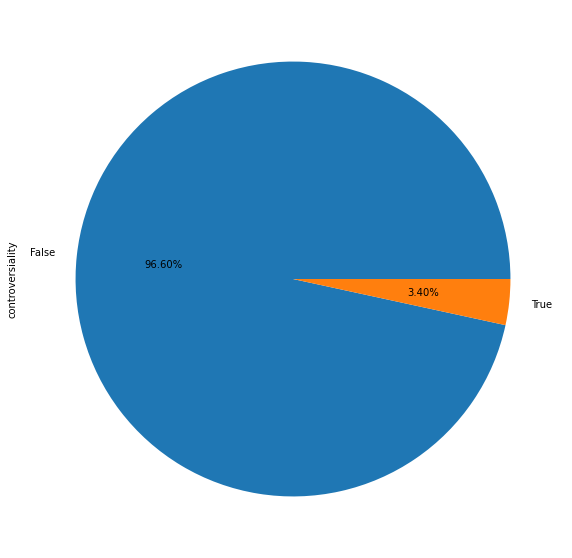

In [16]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [17]:
df['stickied'] = df['stickied'].replace(0,False)

False    253785
Name: stickied, dtype: int64


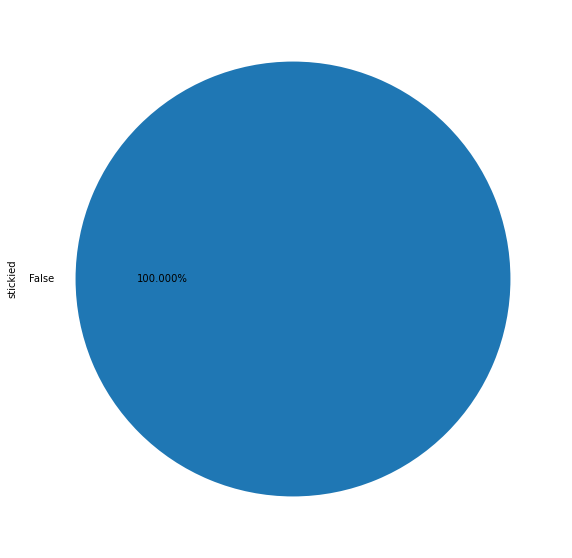

In [18]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# Link_id

t3_7buc2z    899
t3_7ak8dr    813
t3_7erf46    761
t3_7butpj    742
t3_7fevw2    643
            ... 
t3_7f403o      1
t3_7g0a9m      1
t3_7bo9wy      1
t3_7c7919      1
t3_7e9oh4      1
Name: link_id, Length: 13134, dtype: int64


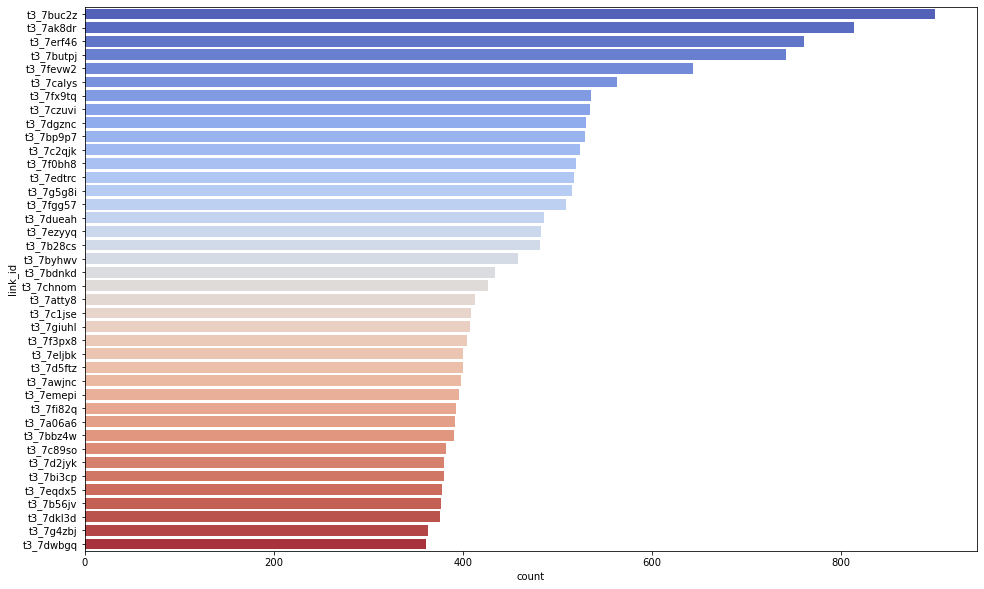

In [19]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [20]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 13134


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

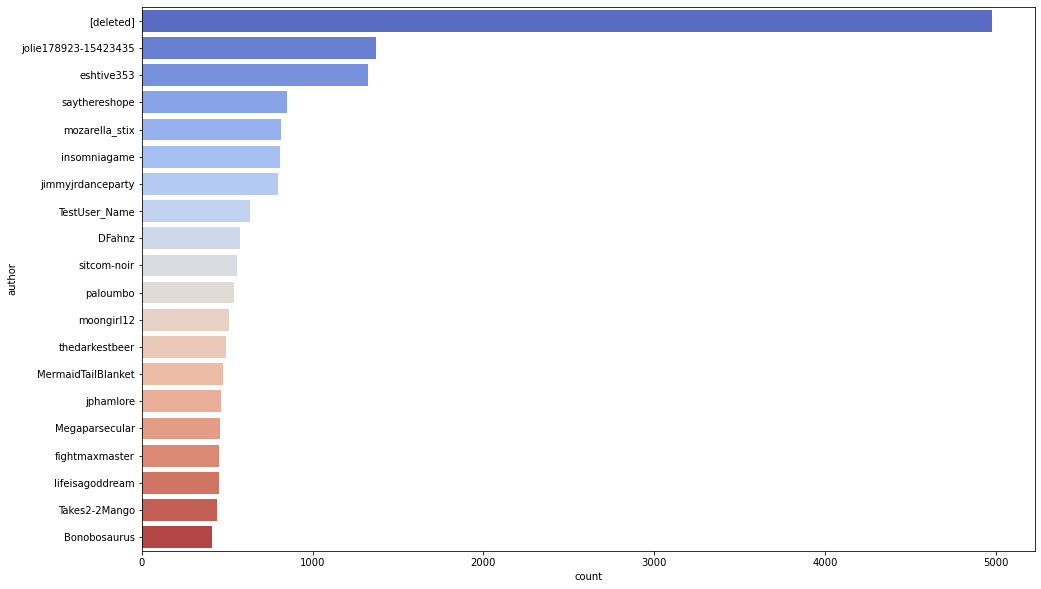

In [21]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

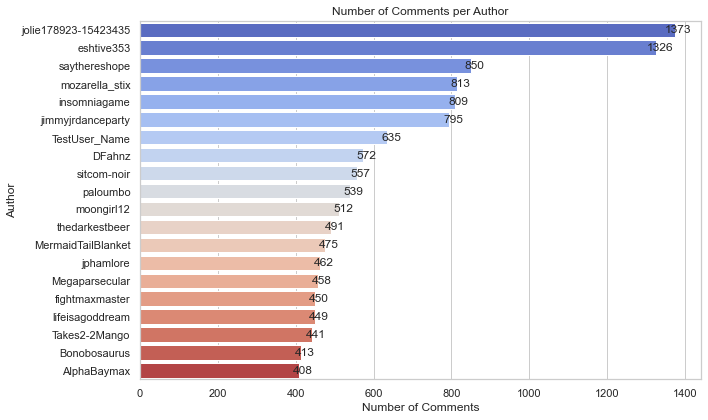

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [23]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 19.32


In [24]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 6.96


In [25]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')
36474

Gesamtanzahl der Authoren: 36465


36474

# Hours

([<matplotlib.axis.XTick at 0x7faa13007f10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

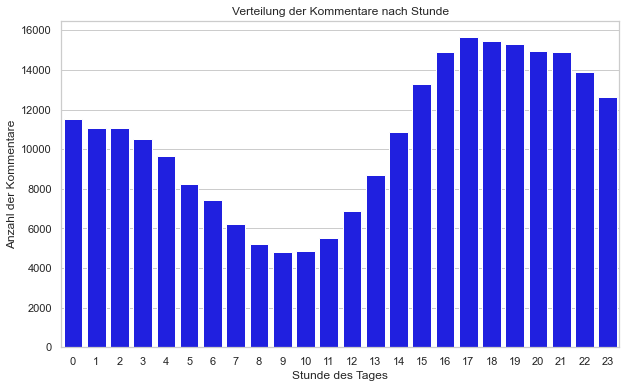

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

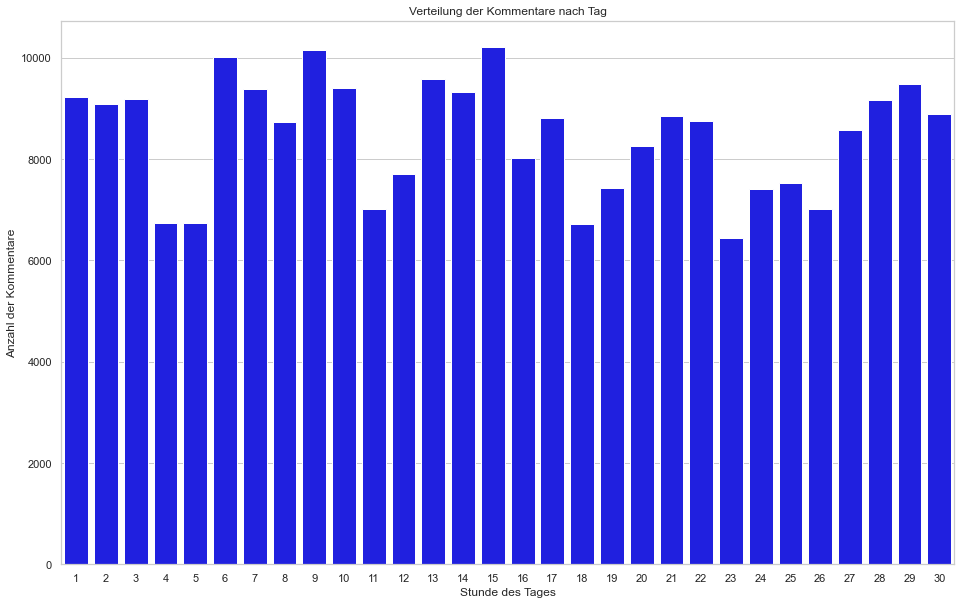

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    253712
1        68
2         5
Name: gilded, dtype: int64


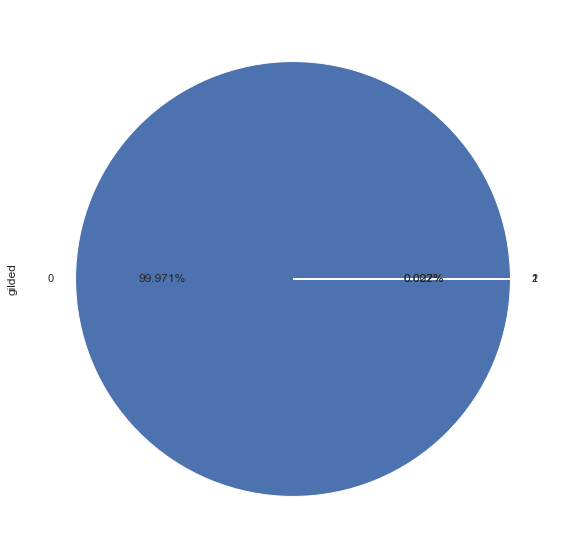

In [28]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguised

In [29]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        253783
moderator         2
Name: distinguished, dtype: int64


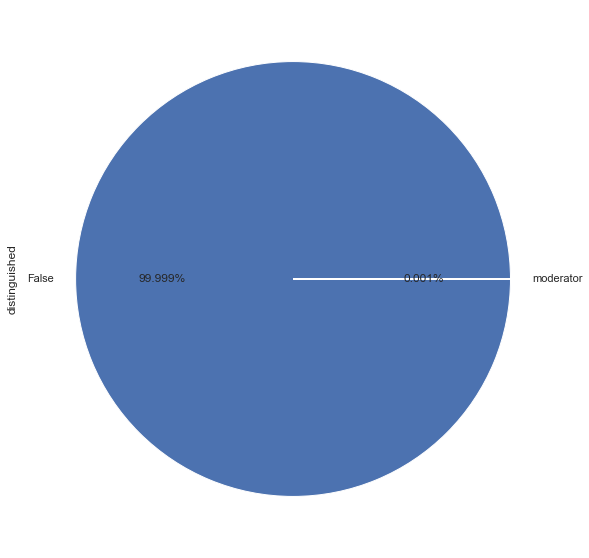

In [30]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [31]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    245186
True       8599
Name: edited, dtype: int64


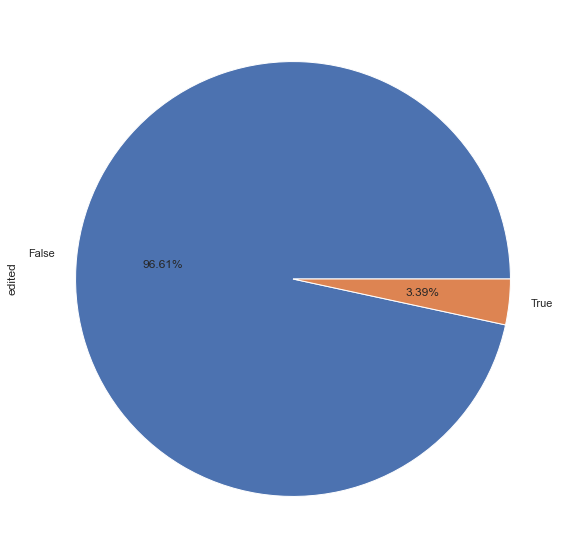

In [32]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [33]:
df["score"].mean()

19.519660342415825

In [34]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
82594,SolidJade,0,Put it in a frame or something somewhere visib...,True,False,2017-11-10 11:32:44,False,False,0,dpm7anj,t3_7c0fyr,t3_7c0fyr,6055,False,11,10,2017,Put it in a frame or something somewhere visib...,86
74817,Motherfuckerjonesyo,0,"Hi OP, I have severe ulcerative colitis. I've ...",True,False,2017-11-09 17:26:56,False,True,2,dpkw48x,t3_7buc2z,t3_7buc2z,5681,False,17,9,2017,Hi OP I have severe ulcerative colitis . I ve ...,485
172149,MisterSnah,0,I have been drunk and 100% white hot furious a...,True,False,2017-11-21 01:00:58,False,True,0,dq4a04o,t3_7edtrc,t3_7edtrc,5681,False,1,21,2017,I have been drunk and white hot furious at my ...,44
74136,[deleted],0,You're wondering if this is a deal breaker? Lo...,False,False,2017-11-09 16:22:00,False,False,1,dpksas1,t3_7buc2z,t3_7buc2z,5410,False,16,9,2017,You re wondering if this is a deal breaker Lol...,51
48871,km89,0,"If you want to explain it to family, just lay ...",True,False,2017-11-06 20:00:23,False,False,0,dpfub1b,t3_7b7nnq,t3_7b7nnq,4750,False,20,6,2017,If you want to explain it to family just lay i...,80
181076,anjufordinner,0,I have a fetish for men who aren't this fuckin...,True,False,2017-11-22 01:03:27,False,False,0,dq637dc,t3_7eljbk,t3_7eljbk,4566,False,1,22,2017,I have a fetish for men who aren t this fuckin...,13
68769,Zorkeldschorken,0,This is emotional blackmail. Never put up with...,True,False,2017-11-08 23:20:53,False,False,0,dpjq5vi,t3_7bp9p7,t3_7bp9p7,4454,False,23,8,2017,This is emotional blackmail . Never put up wit...,32
252973,throwaway29093,0,Tell the school your roommate has her mom more...,True,False,2017-11-30 22:17:11,False,False,0,dqkvtvx,t3_7gq3vk,t3_7gq3vk,4171,False,22,30,2017,Tell the school your roommate has her mom more...,43
42405,MAXIMUM_FARTING,0,"37, divorced, two disrespectful kids and an ex...",True,False,2017-11-06 03:11:01,False,False,0,dpeqb83,t3_7b28cs,t3_7b28cs,4017,False,3,6,2017,divorced two disrespectful kids and an ex wife...,98
94301,CannibalBun,0,Dont drive her. She can get an uber or lyft. S...,True,False,2017-11-11 20:16:17,False,False,0,dpoeiy6,t3_7calys,t3_7calys,3987,False,20,11,2017,Dont drive her . She can get an uber or lyft ....,59


In [35]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
212077,1timealonenaban,0,"Yes, I'm surprised he didn't plead his case mo...",True,False,2017-11-26 03:26:39,False,False,0,dqcg29e,t3_7fk6oh,t1_dqcfk9o,-308,False,3,26,2017,Yes I m surprised he didn t plead his case mor...,29
163144,Confused1dad,0,Why not? More kids might make her stay...,True,False,2017-11-19 23:05:38,False,False,0,dq2cjom,t3_7e42dg,t1_dq2bpoh,-291,False,23,19,2017,Why not More kids might make her stay ...,9
128723,thatdboy,0,"Fuck that, Id sweep this under the rug real qu...",True,False,2017-11-15 18:01:19,False,False,0,dpv86a5,t3_7d5cut,t1_dpv3pwr,-261,False,18,15,2017,Fuck that Id sweep this under the rug real qui...,26
105927,concernedmother4i343,0,"The dodgy types coming around is true, but the...",True,False,2017-11-13 07:46:52,False,False,0,dpqu86b,t3_7cljrc,t1_dpqtsnc,-253,False,7,13,2017,The dodgy types coming around is true but the ...,152
227780,jcjthrowaway17,0,"My daughter is an amazing human being, I would...",True,False,2017-11-28 03:34:47,False,False,0,dqftr6x,t3_7g13zl,t1_dqftk8l,-213,False,3,28,2017,My daughter is an amazing human being I would ...,80
231800,149help,0,"I gave her a ride because she was very, very d...",True,False,2017-11-28 17:20:45,False,False,0,dqgnoji,t3_7g5g8i,t1_dqgmp9a,-199,False,17,28,2017,I gave her a ride because she was very very dr...,33
52605,[deleted],0,You seem very controlling are the men in your ...,False,False,2017-11-07 04:32:22,False,False,0,dpglih0,t3_7b9vsq,t1_dpgk30m,-198,False,4,7,2017,You seem very controlling are the men in your ...,26
182509,kdw48,0,Clearly you don’t understand the pain and emot...,True,False,2017-11-22 04:46:52,False,False,0,dq6diy9,t3_7eo3sg,t1_dq6dh7b,-175,False,4,22,2017,Clearly you don t understand the pain and emot...,15
228843,pesmaniac,0,Come on. Are you serious? It was not like he i...,True,False,2017-11-28 06:44:22,False,False,0,dqg1ehg,t3_7fzxht,t1_dqfk1ww,-169,False,6,28,2017,Come on . Are you serious It was not like he i...,130
235793,stuckinthemiddle2345,0,I get that it's completely unfair and agree wi...,True,False,2017-11-29 00:55:04,False,False,0,dqhewe8,t3_7g8v03,t1_dqhdexq,-150,False,0,29,2017,I get that it s completely unfair and agree wi...,76


# Score vs hours on Comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

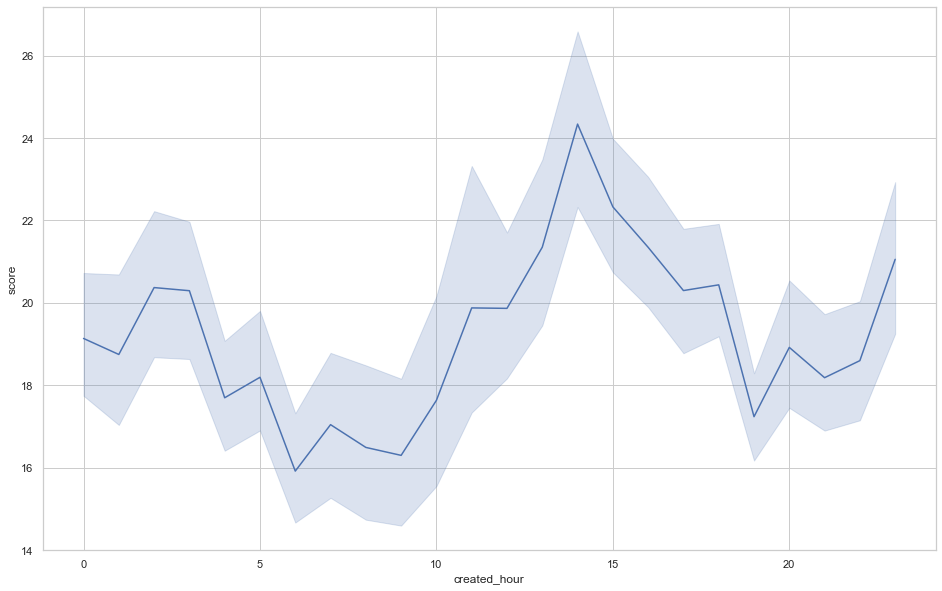

In [36]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score on Comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

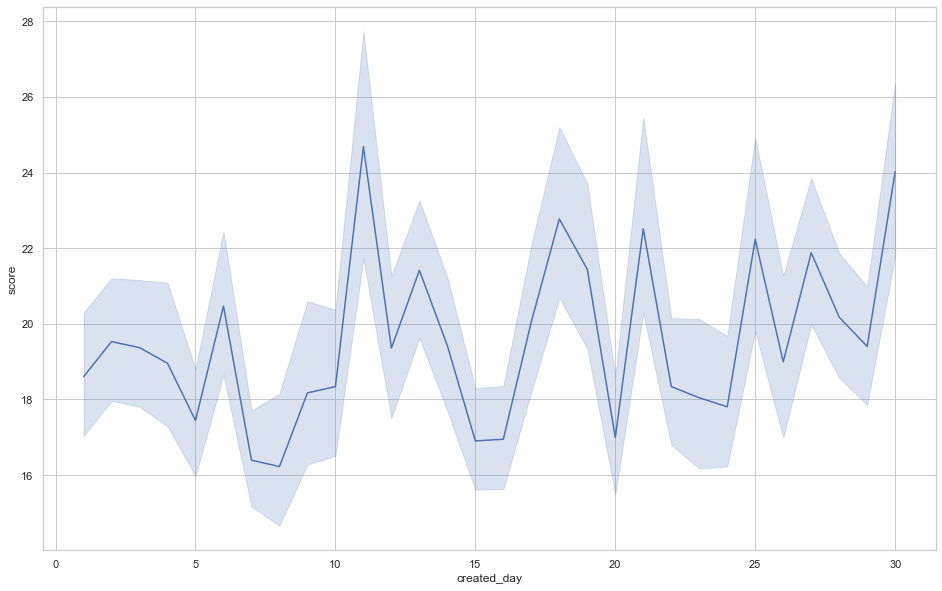

In [37]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

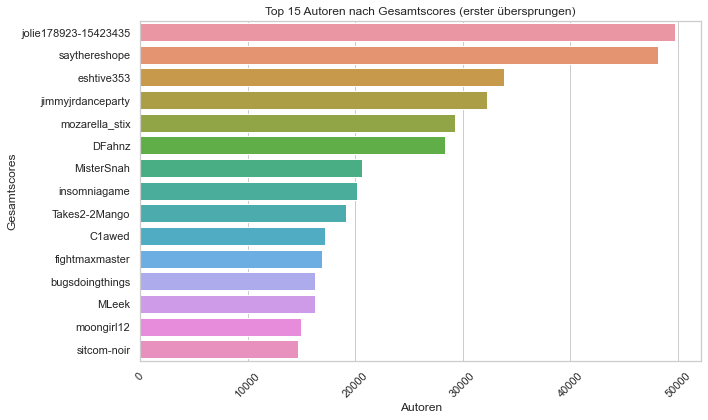

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df.describe()

,author_flair_text,gilded,score,created_hour,created_day,created_year,comment_len
count,253785.0,253785.000000,253785.00000,253785.000000,253785.000000,253785.0,253785.000000
mean,0.0,0.000307,19.51966,12.839486,15.303005,2017.0,76.122281
std,0.0,0.018619,89.44469,7.312760,8.704128,0.0,83.838175
min,0.0,0.000000,-308.00000,0.000000,1.000000,2017.0,1.000000
25%,0.0,0.000000,1.00000,6.000000,8.000000,2017.0,25.000000
50%,0.0,0.000000,3.00000,15.000000,15.000000,2017.0,51.000000
75%,0.0,0.000000,12.00000,19.000000,23.000000,2017.0,97.000000
max,0.0,2.000000,6055.00000,23.000000,30.000000,2017.0,2092.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253785 entries, 0 to 253824
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             253785 non-null  object
 1   author_flair_text  253785 non-null  int64 
 2   body               253785 non-null  object
 3   can_gild           253785 non-null  bool  
 4   controversiality   253785 non-null  bool  
 5   created_utc        253785 non-null  object
 6   distinguished      253785 non-null  object
 7   edited             253785 non-null  bool  
 8   gilded             253785 non-null  int64 
 9   id                 253785 non-null  object
 10  link_id            253785 non-null  object
 11  parent_id          253785 non-null  object
 12  score              253785 non-null  int64 
 13  stickied           253785 non-null  bool  
 14  created_hour       253785 non-null  int64 
 15  created_day        253785 non-null  int64 
 16  created_year       2

In [41]:
df.describe()

,author_flair_text,gilded,score,created_hour,created_day,created_year,comment_len
count,253785.0,253785.000000,253785.00000,253785.000000,253785.000000,253785.0,253785.000000
mean,0.0,0.000307,19.51966,12.839486,15.303005,2017.0,76.122281
std,0.0,0.018619,89.44469,7.312760,8.704128,0.0,83.838175
min,0.0,0.000000,-308.00000,0.000000,1.000000,2017.0,1.000000
25%,0.0,0.000000,1.00000,6.000000,8.000000,2017.0,25.000000
50%,0.0,0.000000,3.00000,15.000000,15.000000,2017.0,51.000000
75%,0.0,0.000000,12.00000,19.000000,23.000000,2017.0,97.000000
max,0.0,2.000000,6055.00000,23.000000,30.000000,2017.0,2092.000000


# Save cleaned general data

In [46]:
df.to_csv("relationship_17_comments_EDA_clean.csv",index=False,sep=";")

In [47]:
import pandas as pd
import pandas as pd
test_author=pd.read_csv("relationship_17_comments_EDA_clean.csv",sep=";")
print("Anzahl der Authoren==",test_author['author'].nunique())

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Anzahl der Authoren== 36466


In [48]:
test_author.describe()

,author_flair_text,gilded,score,created_hour,created_day,created_year,comment_len
count,253785.0,253785.000000,253785.00000,253785.000000,253785.000000,253785.0,253785.000000
mean,0.0,0.000307,19.51966,12.839486,15.303005,2017.0,76.122281
std,0.0,0.018619,89.44469,7.312760,8.704128,0.0,83.838175
min,0.0,0.000000,-308.00000,0.000000,1.000000,2017.0,1.000000
25%,0.0,0.000000,1.00000,6.000000,8.000000,2017.0,25.000000
50%,0.0,0.000000,3.00000,15.000000,15.000000,2017.0,51.000000
75%,0.0,0.000000,12.00000,19.000000,23.000000,2017.0,97.000000
max,0.0,2.000000,6055.00000,23.000000,30.000000,2017.0,2092.000000


In [49]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253785 entries, 0 to 253784
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             253785 non-null  object
 1   author_flair_text  253785 non-null  int64 
 2   body               253785 non-null  object
 3   can_gild           253785 non-null  bool  
 4   controversiality   253785 non-null  bool  
 5   created_utc        253785 non-null  object
 6   distinguished      253785 non-null  object
 7   edited             253785 non-null  bool  
 8   gilded             253785 non-null  int64 
 9   id                 253785 non-null  object
 10  link_id            253785 non-null  object
 11  parent_id          253785 non-null  object
 12  score              253785 non-null  int64 
 13  stickied           253785 non-null  bool  
 14  created_hour       253785 non-null  int64 
 15  created_day        253785 non-null  int64 
 16  created_year       2

In [50]:
test_author.describe()

,author_flair_text,gilded,score,created_hour,created_day,created_year,comment_len
count,253785.0,253785.000000,253785.00000,253785.000000,253785.000000,253785.0,253785.000000
mean,0.0,0.000307,19.51966,12.839486,15.303005,2017.0,76.122281
std,0.0,0.018619,89.44469,7.312760,8.704128,0.0,83.838175
min,0.0,0.000000,-308.00000,0.000000,1.000000,2017.0,1.000000
25%,0.0,0.000000,1.00000,6.000000,8.000000,2017.0,25.000000
50%,0.0,0.000000,3.00000,15.000000,15.000000,2017.0,51.000000
75%,0.0,0.000000,12.00000,19.000000,23.000000,2017.0,97.000000
max,0.0,2.000000,6055.00000,23.000000,30.000000,2017.0,2092.000000


In [51]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253785 entries, 0 to 253784
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             253785 non-null  object
 1   author_flair_text  253785 non-null  int64 
 2   body               253785 non-null  object
 3   can_gild           253785 non-null  bool  
 4   controversiality   253785 non-null  bool  
 5   created_utc        253785 non-null  object
 6   distinguished      253785 non-null  object
 7   edited             253785 non-null  bool  
 8   gilded             253785 non-null  int64 
 9   id                 253785 non-null  object
 10  link_id            253785 non-null  object
 11  parent_id          253785 non-null  object
 12  score              253785 non-null  int64 
 13  stickied           253785 non-null  bool  
 14  created_hour       253785 non-null  int64 
 15  created_day        253785 non-null  int64 
 16  created_year       2